## Check EMs (spin 0 vs spin 1/2)

In [1]:
# Set up the path to SModelS installation folder
import sys,os
sys.path.append(os.path.expanduser('~/smodels'))

In [10]:
from smodels.tools import runtime
from smodels.theory import decomposer
from smodels.tools.physicsUnits import fb, GeV, TeV
from smodels.theory.theoryPrediction import theoryPredictionsFor
from smodels.experiment.databaseObj import Database
from smodels.tools import coverage
from smodels.tools.smodelsLogging import setLogLevel
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels import particlesLoader
from imp import reload
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
setLogLevel("info")

### Points to be checked:

In [3]:
LLPmass = np.arange(100.,750.,25.)
widths = np.logspace(-17,-13,20)

### Load the Database of experimental results

In [4]:
# Set the path to the database
database = Database(os.path.expanduser('~/smodels-database'))

INFO in databaseObj.loadBinaryFile() in 212: loading binary db file /home/lessa/smodels-database/db31.pcl format version 213
INFO in databaseObj.loadBinaryFile() in 219: Loaded database from /home/lessa/smodels-database/db31.pcl in 1.1 secs.


In [5]:
exp = database.getExpResults(analysisIDs='ATLAS-SUSY-2016-06')[0]
print(exp)
txF = exp.getTxnameWith({'txName' : 'TDTM1F'})
txS = exp.getTxnameWith({'txName' : 'TDTM1S'})
print(txF,txS)

ATLAS-SUSY-2016-06: SR_EW(1):TDTM1F,TDTM1S,TDTM2F,TDTM2S(4)
TDTM1F TDTM1S


In [6]:
points = []
for M0 in LLPmass:
    M1 = M0-0.1
    for width in widths:
        massArray = 2*[[(M0*GeV,width*GeV),M1*GeV]]
        effF = txF.txnameData.getValueFor(massArray)
        effS = txS.txnameData.getValueFor(massArray)
        if effF is None or effS is None:
            continue
        points.append([M0,width,effF,effS])

In [7]:
points = np.array(points)

### Compare the results

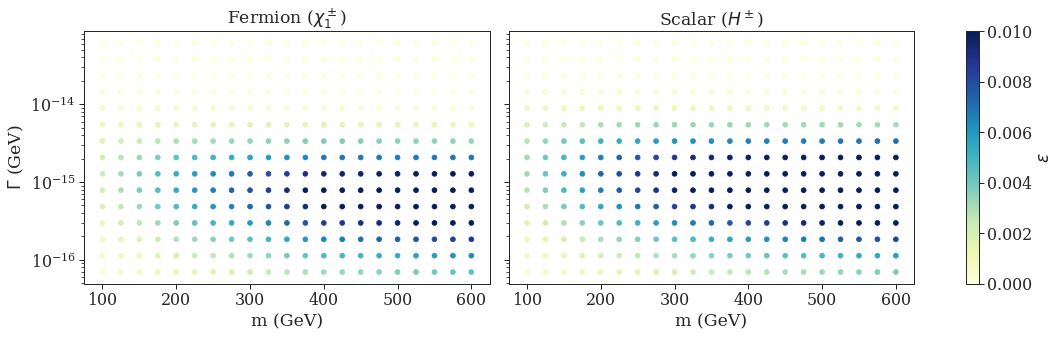

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5),sharey=True)
ax[0].scatter(points[:,0],points[:,1],c=points[:,2],vmin=0.0,vmax=1e-2,cmap="YlGnBu")
a = ax[1].scatter(points[:,0],points[:,1],c=points[:,3],vmin=0.0,vmax=1e-2,cmap="YlGnBu")

for axis in ax:
    axis.set_yscale('log')    
    axis.set_xlabel(r'm (GeV)')

ax[0].set_ylabel(r'$\Gamma$ (GeV)')
ax[0].set_title(r'Fermion ($\chi_1^\pm$)')    
ax[1].set_title(r'Scalar ($H^\pm$)')    
plt.tight_layout()
cb = fig.colorbar(a, ax=ax.ravel().tolist())
cb.set_label(r'$\epsilon$')
plt.show()

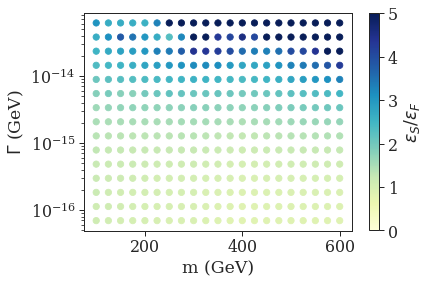

In [35]:
plt.scatter(points[:,0],points[:,1],c=(points[:,3]/points[:,2]),vmin=0.,vmax=5,cmap="YlGnBu",s=40)
plt.yscale('log')
plt.ylabel(r'$\Gamma$ (GeV)')
plt.xlabel(r'm (GeV)')
plt.colorbar(label=r'$\epsilon_{S}/\epsilon_F$')
plt.show()